<a href="https://colab.research.google.com/github/hng07/plant-seedlings-classification/blob/main/Proje_VeriMadenciligi_Sonhali2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üéØ Proje Ba≈ülƒ±ƒüƒ±
Bitki Fide T√ºrlerinin CNN ile G√∂r√ºnt√ºden Sƒ±nƒ±flandƒ±rƒ±lmasƒ±

#üìå Projenin Amacƒ±
Bu projenin amacƒ±, farklƒ± bitki fide t√ºrlerini i√ßeren g√∂rseller √ºzerinden derin √∂ƒürenme modelleri kullanarak doƒüru ≈üekilde sƒ±nƒ±flandƒ±rma yapabilen bir g√∂r√ºnt√º sƒ±nƒ±flandƒ±rma sistemi geli≈ütirmektir. √ñzellikle tarƒ±m teknolojilerinde otomatik bitki tanƒ±ma, hastalƒ±k te≈ühisi veya √ºr√ºn sƒ±nƒ±flamasƒ± gibi alanlarda kullanƒ±labilecek temel bir sistem tasarlanmƒ±≈ütƒ±r.

#üìÇ Kullanƒ±lan Veri Seti
Veri Seti Adƒ±: Plant Seedlings Classification

Kaynak: Kaggle (Resmi yarƒ±≈üma veri seti)

Veri Yapƒ±sƒ±:

train/: 12 adet bitki sƒ±nƒ±fƒ±na ait 4.750 etiketli g√∂r√ºnt√º (alt klas√∂rler ≈üeklinde)

test/: 794 adet etiketsiz g√∂r√ºnt√º (modelin tahmin yapmasƒ± i√ßin)


#üßæ Sƒ±nƒ±flar (Etiketler)
Veri setinde bulunan sƒ±nƒ±f isimleri ≈üunlardƒ±r:

Black-grass, Charlock, Cleavers, Common Chickweed, Common Wheat, Fat Hen, Loose Silky-bent, Maize, Scentless Mayweed, Shepherd‚Äôs Purse, Small-flowered Cranesbill, Sugar Beet


#üîç Temel √ñzellikler
G√∂rsellerin √ß√∂z√ºn√ºrl√ºkleri farklƒ±dƒ±r, model giri≈üine uygun ≈üekilde yeniden boyutlandƒ±rƒ±lmƒ±≈ütƒ±r.

Veri seti dengesizdir; bazƒ± sƒ±nƒ±flar 600'den fazla √∂rnek i√ßerirken bazƒ±larƒ± sadece 200 civarƒ±ndadƒ±r.

Bu nedenle class_weight y√∂ntemiyle sƒ±nƒ±f dengesizliƒüi modellenmi≈ütir.

CNN modeli sƒ±fƒ±rdan olu≈üturulmu≈ü ve alternatif olarak transfer learning y√∂ntemleriyle kar≈üƒ±la≈ütƒ±rma yapƒ±lmaya uygundur.

# 2. Gerekli K√ºt√ºphanelerin Y√ºklenmesi  
Analiz, g√∂rselle≈ütirme ve modelleme i√ßin ihtiya√ß duyulan Python paketlerini (`numpy`, `pandas`, `scikit‚Äëlearn` vb.) i√ße aktarƒ±ldƒ±.

# 3. Verinin Y√ºklenmesi ve ƒ∞lk ƒ∞nceleme  
Eƒüitim verisi: 4.750 adet

Test verisi: 794 adet

Sƒ±nƒ±f sayƒ±sƒ±: 12

# 4. Ke≈üifsel Veri Analizi (EDA)  
# üìÅ 4.1 Veri Seti Yapƒ±sƒ± ve Boyutu
Eƒüitim verisi klas√∂r√ºnde toplam 4.750 etiketli g√∂r√ºnt√º, test klas√∂r√ºnde ise 794 etiketsiz g√∂r√ºnt√º yer almaktadƒ±r.

G√∂rseller .png formatƒ±ndadƒ±r ve sƒ±nƒ±flar train klas√∂r√ºnde alt klas√∂r olarak d√ºzenlenmi≈ütir.

# üß™ 4.2 Eksik Deƒüer Analizi
G√∂r√ºnt√º tabanlƒ± projelerde eksik veri analizi ≈üu ≈üekilde yapƒ±lƒ±r:

Eksik ya da bozuk g√∂rsel var mƒ±? (Dosya okunamƒ±yor, boyutu sƒ±fƒ±r vb.)

Bu veri setinde, dosya sisteminden ve TensorFlow image_dataset_from_directory() fonksiyonundan gelen bilgiye g√∂re eksik ya da bozuk dosya bulunmamaktadƒ±r.

# üìä 4.3 Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ± (Kategorik Daƒüƒ±lƒ±m Analizi)
Sƒ±nƒ±f ba≈üƒ±na g√∂rsel sayƒ±sƒ± hesaplanmƒ±≈ü ve grafikte g√∂rselle≈ütirilmi≈ütir:

Veri setinde belirgin bir sƒ±nƒ±f dengesizliƒüi mevcuttur.

√ñrneƒüin: Loose Silky-bent sƒ±nƒ±fƒ±nda ~650 √∂rnek varken, Common Wheat, Maize gibi sƒ±nƒ±flarda ~230 √∂rnek bulunmaktadƒ±r.

# üß† 4.4 Veri √ñrnekleri (G√∂rsel EDA)
Her sƒ±nƒ±ftan √∂rnek g√∂r√ºnt√ºler incelenmi≈ü ve modelin hangi sƒ±nƒ±fƒ± √∂ƒürendiƒüi g√∂zlemlenmi≈ütir:

# üß© 4.5 Korelasyon Yerine Confusion Matrix
G√∂r√ºnt√º verilerinde deƒüi≈ükenler arasƒ± korelasyon yerine, modelin √∂ƒürenme kalitesini g√∂rmek i√ßin confusion matrix kullanƒ±lƒ±r. Bu matriste:

Hangi sƒ±nƒ±flar doƒüru tahmin edilmi≈ü?

Hangi sƒ±nƒ±flar birbiriyle karƒ±≈ütƒ±rƒ±lmƒ±≈ü?

gibi sorularƒ±n yanƒ±tƒ± verilir (√∂rneƒüin Maize ile Sugar beet karƒ±≈üabilir).
# 5. Veri √ñn ƒ∞≈üleme  
# üß© 5.1 Eksik Deƒüer ƒ∞≈ülemleri
G√∂r√ºnt√º veri k√ºmesinde eksik h√ºcre (NaN) yerine:

Bozuk, bo≈ü veya eksik g√∂rsel dosyalarƒ± kontrol edilir.

image_dataset_from_directory() fonksiyonu sƒ±rasƒ±nda TensorFlow, dosyalarƒ± ba≈üarƒ±yla okuduƒüu i√ßin bozuk g√∂rsel bulunmadƒ±.

Bu nedenle eksik veri i≈ülemi uygulanmasƒ±na gerek yoktur.

# üî† 5.2 Etiketlerin Sayƒ±sal Forma D√∂n√º≈üt√ºr√ºlmesi
G√∂r√ºnt√º klas√∂r isimleri otomatik olarak TensorFlow tarafƒ±ndan etiketlere d√∂n√º≈üt√ºr√ºl√ºr:
B√∂ylece LabelEncoder kullanmaya gerek kalmadan, model eƒüitiminde kullanƒ±labilecek sayƒ±sal etiketler hazƒ±r hale gelir.

# üîÑ 5.4 Veri Artƒ±rma (Data Augmentation)
Ayrƒ±ca g√∂r√ºnt√º √ße≈üitliliƒüini artƒ±rmak i√ßin a≈üaƒüƒ±daki teknikler uygulanmƒ±≈ütƒ±r:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])
Bu adƒ±m, modelin genel performansƒ±nƒ± artƒ±rmak ve overfitting‚Äôi azaltmak i√ßin olduk√ßa √∂nemlidir.

# ‚öñÔ∏è 5.5 Sƒ±nƒ±f Dengesizliƒüi ƒ∞√ßin Class Weight Kullanƒ±mƒ±
Dengesiz sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± dengelemek i√ßin eƒüitim sƒ±rasƒ±nda class_weight parametresi verilmi≈ütir. Bu da bir t√ºr √∂n i≈ülem olarak d√º≈ü√ºn√ºlebilir √ß√ºnk√º modelin √∂ƒürenme s√ºrecini etkiler.

# 6. Model Se√ßimi ve Eƒüitimi  
# üéØ 6.1 √ñzellik (X) ve Hedef (y) Ayƒ±rma
G√∂r√ºnt√º veri setlerinde:

√ñzellikler (X): G√∂rsellerin piksel verileridir (RGB deƒüerleri)

Hedef (y): G√∂rselin ait olduƒüu sƒ±nƒ±f etiketidir (√∂rneƒüin Maize, Charlock vb.)

TensorFlow image_dataset_from_directory() fonksiyonu bu ayrƒ±mƒ± otomatik olarak yapar:
for images, labels in train_ds.take(1):
    print(images.shape)  # (batch_size, 128, 128, 3)
    print(labels.shape)  # (batch_size,)

# üß™ 6.2 Eƒüitim ve Doƒürulama Setine Ayƒ±rma
G√∂r√ºnt√ºler batch‚Äôli bir veri k√ºmesi olarak geldiƒüi i√ßin train_test_split yerine TensorFlow‚Äôun unbatch() ve shuffle() i≈ülemleriyle elle ayƒ±rma yapƒ±lƒ±r:
 T√ºm veriyi unbatch edip karƒ±≈ütƒ±r
all_data = list(train_ds.unbatch().as_numpy_iterator())
random.shuffle(all_data)

 %80 eƒüitim, %20 doƒürulama
split_idx = int(len(all_data) * 0.8)
train_data = all_data[:split_idx]
val_data = all_data[split_idx:]

 Veri setlerine d√∂n√º≈üt√ºr
train_ds_new = tf.data.Dataset.from_generator(...).batch(32).prefetch(...)
val_ds = tf.data.Dataset.from_generator(...).batch(32).prefetch(...)

# 7. Model Deƒüerlendirme  
- Test seti √ºzerinde tahmin yapƒ±n.  
- `classification_report`, ROC‚ÄëAUC, doƒüruluk gibi metriklerle performansƒ± √∂l√ß√ºn.  
- Confusion matrix ve/veya ROC eƒürisi g√∂rselle≈ütirin.

# 8. Sonu√ß ve Yorumlar  
#üéØ Genel Deƒüerlendirme
Bu projede, 12 farklƒ± bitki fidesini yalnƒ±zca g√∂r√ºnt√ºlerine bakarak sƒ±nƒ±flandƒ±ran bir derin √∂ƒürenme modeli geli≈ütirilmi≈ütir. Eƒüitilen model, doƒürulama verisinde yakla≈üƒ±k %72‚Äì80 doƒüruluk aralƒ±ƒüƒ±nda performans g√∂stermi≈ütir.

# üí™ G√º√ßl√º Y√∂nler
G√∂rsel veriyi doƒürudan i≈üleyebilen CNN mimarisi ba≈üarƒ±yla uygulanmƒ±≈ütƒ±r.

class_weight kullanƒ±larak sƒ±nƒ±f dengesizliƒüi etkisi azaltƒ±lmƒ±≈ütƒ±r.

Modelin ba≈üarƒ±sƒ± hem doƒüruluk, hem de confusion matrix ve ROC eƒürisi gibi √ßoklu metriklerle deƒüerlendirilmi≈ütir.

ROC eƒürisinde √∂zellikle y√ºksek √∂rnek sayƒ±sƒ±na sahip sƒ±nƒ±flarda ba≈üarƒ±lƒ± ayrƒ±mlar yapƒ±lmƒ±≈ütƒ±r.

Eƒüitim s√ºreci boyunca overfitting minimal d√ºzeyde kalmƒ±≈ü, eƒüitim ve doƒürulama doƒüruluklarƒ± uyumlu ilerlemi≈ütir.

# ‚ö†Ô∏è Zayƒ±f Y√∂nler ve Sƒ±nƒ±rlamalar
Sƒ±nƒ±flar arasƒ±ndaki g√∂r√ºnt√º benzerlikleri (√∂rneƒüin: Maize ve Sugar beet) bazƒ± yanlƒ±≈ü sƒ±nƒ±flamalara neden olmu≈ütur.

Veri seti dengesizdir; az sayƒ±da √∂rneƒüe sahip sƒ±nƒ±flar daha zor √∂ƒürenilmi≈ütir.

G√∂r√ºnt√ºler doƒüal ƒ±≈üƒ±k, arka plan ve a√ßƒ± farklƒ±lƒ±klarƒ± i√ßerdiƒüinden modelin genellenebilirliƒüi d√º≈üebilir.

Modelin yalnƒ±zca piksel bilgisine dayanmasƒ±, yaprak ≈üekli veya bitki morfolojisini yeterince soyutlayamamasƒ±na neden olabilir

# üß™ Olasƒ± Hata Kaynaklarƒ±
Bazƒ± g√∂rsellerde yapraklar bulanƒ±k, eksik veya zemine karƒ±≈ümƒ±≈ü olabilir.

Etiketleme hatalarƒ± (veri seti kaynaklƒ±) modelin √∂ƒürenmesini olumsuz etkileyebilir.

G√∂rsellerin √ß√∂z√ºn√ºrl√ºƒü√º d√º≈ü√ºr√ºld√ºƒü√º i√ßin bazƒ± ayƒ±rt edici detaylar kaybolmu≈ü olabilir.

# üöÄ Gelecek √áalƒ±≈ümalar ƒ∞√ßin √ñneriler
Transfer Learning kullanƒ±larak daha g√º√ßl√º (√∂rneƒüin EfficientNet, ResNet) modeller denenebilir.

G√∂rsel kaliteyi artƒ±rmak ve g√ºr√ºlt√ºleri azaltmak i√ßin √∂n i≈üleme adƒ±mlarƒ± eklenebilir.

Ek veri artƒ±rma y√∂ntemleri (CutMix, MixUp, ColorJitter) uygulanabilir.

Model, ger√ßek zamanlƒ± sistemlere entegre edilerek mobil uygulamalarda denenebilir.

# 9. ƒ∞leri √áalƒ±≈ümalar  
# üîÅ9.1. Transfer Learning Uygulamasƒ±
Daha g√º√ßl√º ve √∂nceden eƒüitilmi≈ü modeller (√∂rn. MobileNetV2, ResNet50, EfficientNet) ile performans artƒ±rƒ±labilir.

Bu modeller sayesinde eƒüitim s√ºresi kƒ±salƒ±r ve doƒüruluk oranlarƒ± artar.

# üß™9.2. ƒ∞leri Seviye Veri Artƒ±rma Teknikleri
Basit Flip, Rotation yerine ≈üunlar denenebilir:

CutMix, MixUp, RandomContrast, ColorJitter

Az √∂rnekli sƒ±nƒ±flar i√ßin √∂zel augmentasyon (sƒ±nƒ±fa √∂zel artƒ±rma)

# üóÉÔ∏è9.3. Veri Setini Geni≈ületme
Yeni bitki t√ºrleri eklenebilir.

Mevcut t√ºrlerden daha fazla √∂rnek toplanarak sƒ±nƒ±f dengesi artƒ±rƒ±labilir.

Farklƒ± hava ko≈üullarƒ±nda, farklƒ± zeminlerde √ßekilmi≈ü g√∂r√ºnt√ºlerle model genelle≈ütirilebilir.

# üì±9.4. Modelin Ger√ßek Zamanlƒ± Uygulamasƒ±
Eƒüitilen model, bir mobil uygulama veya web aray√ºz√º ile entegre edilebilir.

√áift√ßiler veya tarƒ±m uzmanlarƒ±, mobil kamera aracƒ±lƒ±ƒüƒ±yla anlƒ±k sƒ±nƒ±flandƒ±rma yapabilir.

# üß†9.5. Modelin Hata Analizi ve ƒ∞yile≈ütirme
Confusion matrix‚Äôte en √ßok karƒ±≈ütƒ±rƒ±lan sƒ±nƒ±flar belirlenerek o sƒ±nƒ±flar √∂zelinde augmentasyon yapƒ±labilir.

Yanlƒ±≈ü sƒ±nƒ±flamalarƒ±n nedenleri (arka plan, ƒ±≈üƒ±k, benzerlik) √ºzerine analiz yapƒ±labilir.

# üìà9.6. Model Kar≈üƒ±la≈ütƒ±rmalarƒ±
Farklƒ± CNN mimarileri kar≈üƒ±la≈ütƒ±rƒ±labilir (√∂rn. temel CNN vs. transfer learning).

Eƒüitim s√ºresi, doƒüruluk, model boyutu gibi metrikler √ºzerinden kƒ±yaslama yapƒ±labilir.

# 1. üì¶ Gerekli K√ºt√ºphanelerin Y√ºklenmesi  

In [ ]:
# Temel k√ºt√ºphaneler
import numpy as np

# G√∂rselle≈ütirme
import matplotlib.pyplot as plt

# Modelleme
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# ƒ∞steƒüe baƒülƒ±: geli≈ümi≈ü modeller
#from xgboost import XGBClassifier


# 2. üìÑ Dosyayƒ± Y√ºkleme

In [ ]:
# Google Colab'a dosya y√ºkleme (alternatif: drive.mount)
from google.colab import files
files.upload()

# Kaggle'ƒ± kur
!pip install -q kaggle

# .kaggle klas√∂r√º olu≈ütur
!mkdir -p ~/.kaggle

# kaggle.json dosyasƒ±nƒ± ta≈üƒ±
!cp kaggle.json ~/.kaggle/

# ƒ∞zin ayarla
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


# 3. üì¶ Veri Setinin ƒ∞ndirilmesi


In [ ]:
# Plant Seedlings Classification verisini indir
!kaggle competitions download -c plant-seedlings-classification

# 4. üì• Verinin Y√ºklenmesi

In [ ]:
# Zip dosyasƒ±nƒ± a√ß
!unzip plant-seedlings-classification.zip -d plant_seedlings


G√∂r√ºnt√ºlenen √ßƒ±kƒ±≈ü son 5000 satƒ±ra kƒ±saltƒ±ldƒ±.
  inflating: plant_seedlings/test/ad12382d4.png  
  inflating: plant_seedlings/test/adb7a032c.png  
  inflating: plant_seedlings/test/ae90f2827.png  
  inflating: plant_seedlings/test/aecfaed64.png  
  inflating: plant_seedlings/test/aee6fa3df.png  
  inflating: plant_seedlings/test/af45e222a.png  
  inflating: plant_seedlings/test/afa446484.png  
  inflating: plant_seedlings/test/afcf6abd5.png  
  inflating: plant_seedlings/test/b026bf8ca.png  
  inflating: plant_seedlings/test/b03397525.png  
  inflating: plant_seedlings/test/b0acaff4a.png  
  inflating: plant_seedlings/test/b130a0632.png  
  inflating: plant_seedlings/test/b145ba9d4.png  
  inflating: plant_seedlings/test/b1cd2a91e.png  
  inflating: plant_seedlings/test/b215531dd.png  
  inflating: plant_seedlings/test/b2706e2b3.png  
  inflating: plant_seedlings/test/b29339405.png  
  inflating: plant_seedlings/test/b30ab4659.png  
  inflating: plant_seedlings/test/b3129270

# 5. D√ºzensiz Olup Olmadƒ±ƒüƒ±nƒ± Kontrol Etme

In [ ]:
import os
from collections import Counter

data_dir = 'plant_seedlings/train'
class_counts = {}

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Sƒ±ralƒ± ≈üekilde g√∂ster
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Yazdƒ±r
for cls, count in class_counts.items():
    print(f"{cls}: {count} g√∂r√ºnt√º")

# G√∂rselle≈ütir
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("G√∂r√ºnt√º Sayƒ±sƒ±")
plt.title("Sƒ±nƒ±f Bazlƒ± G√∂r√ºnt√º Daƒüƒ±lƒ±mƒ±")
plt.tight_layout()
plt.show()


Loose Silky-bent: 654 g√∂r√ºnt√º
Common Chickweed: 611 g√∂r√ºnt√º
Scentless Mayweed: 516 g√∂r√ºnt√º
Small-flowered Cranesbill: 496 g√∂r√ºnt√º
Fat Hen: 475 g√∂r√ºnt√º
Charlock: 390 g√∂r√ºnt√º
Sugar beet: 385 g√∂r√ºnt√º
Cleavers: 287 g√∂r√ºnt√º
Black-grass: 263 g√∂r√ºnt√º
Shepherds Purse: 231 g√∂r√ºnt√º
Maize: 221 g√∂r√ºnt√º
Common wheat: 221 g√∂r√ºnt√º


Veri setim dengesiz √ßƒ±ktƒ± en az ile en √ßok arasƒ±da yakla≈üƒ±k 3 kat var bu y√ºzden de veri arttƒ±rma yapabilirim


In [ ]:
import tensorflow as tf

IMG_SIZE = (128, 128) # T√ºm g√∂r√ºnt√ºler bu boyuta yeniden √∂l√ßekleniyor
BATCH_SIZE = 32  # Her batch 32 g√∂r√ºnt√º i√ßeriyor

# Training set
train_ds = tf.keras.utils.image_dataset_from_directory( #bozuk g√∂rsel var mƒ±
    'plant_seedlings/train',  # Klas√∂r yolu
    labels='inferred',        # Klas√∂r adlarƒ±ndan etiket √ßƒ±kartƒ±r
    label_mode='int',         # Etiketleri integer olarak al
    image_size=IMG_SIZE,      # G√∂rselleri bu boyutlara yeniden boyutlandƒ±r
    batch_size=BATCH_SIZE,    # Batch boyutu
    shuffle=True,             # Veriyi karƒ±≈ütƒ±r
    seed=42                   # Rastgelelik sabitlenerek sonu√ßlarƒ±n tekrar √ºretilebilir olmasƒ± saƒülanƒ±yor
)

# Test set (etiket yok, sadece g√∂rseller)
test_ds = tf.keras.utils.image_dataset_from_directory(
    'plant_seedlings/test',  # Klas√∂r yolu
    labels=None,             # Test seti etiksiz (label yok)
    image_size=IMG_SIZE,     # G√∂rselleri bu boyuta getirin
    batch_size=BATCH_SIZE,   # Batch boyutu
    shuffle=False            # Test verisini karƒ±≈ütƒ±rma
)


Found 4750 files belonging to 12 classes.
Found 794 files.


dengesiz sƒ±nƒ±f daƒüƒ±lƒ±mƒ± olan veri setlerinde modelin eƒüitimi sƒ±rasƒ±nda daha adil √∂ƒürenme saƒülamak i√ßin sƒ±nƒ±f aƒüƒ±rlƒ±klarƒ±nƒ± hesaplƒ±yor.

√áok az verisi olan sƒ±nƒ±flar daha b√ºy√ºk aƒüƒ±rlƒ±k alƒ±r.
√áok fazla verisi olan sƒ±nƒ±flar daha k√º√ß√ºk aƒüƒ±rlƒ±k alƒ±r.



In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Sƒ±nƒ±f isimlerini sƒ±rayla al
class_names = sorted(class_counts.keys())  # ya da train_ds.class_names

# Eƒüitim setinden ger√ßek etiketleri √ßƒ±kar (√∂rnekle)
y_train = []
for _, labels in train_ds.unbatch():
    y_train.append(labels.numpy())

# Aƒüƒ±rlƒ±klarƒ± hesapla
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

print("Sƒ±nƒ±f aƒüƒ±rlƒ±klarƒ±:", class_weights)

Sƒ±nƒ±f aƒüƒ±rlƒ±klarƒ±: {0: np.float64(1.5050697084917617), 1: np.float64(1.014957264957265), 2: np.float64(1.3792102206736354), 3: np.float64(0.6478450627386798), 4: np.float64(1.7911010558069382), 5: np.float64(0.8333333333333334), 6: np.float64(0.605249745158002), 7: np.float64(1.7911010558069382), 8: np.float64(0.7671188630490956), 9: np.float64(1.7135642135642135), 10: np.float64(0.7980510752688172), 11: np.float64(1.0281385281385282)}


# 6. üîç Verinin ƒ∞ncelenmesi

In [ ]:
!ls plant_seedlings/train      # 12 bitki sƒ±nƒ±fƒ± klas√∂r√ºn√º g√∂receksin
!ls plant_seedlings/test | head  # test klas√∂r√ºndeki *.png dosyalarƒ±ndan birka√ßƒ±nƒ± g√∂ster


 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'
0021e90e4.png
003d61042.png
007b3da8b.png
0086a6340.png
00c47e980.png
00d090cde.png
00ef713a8.png
01291174f.png
026716f9b.png
02cfeb38d.png


In [ ]:
import os

# Veri dizinini kontrol et
data_dir = 'plant_seedlings/train'

# Train klas√∂r√ºndeki sƒ±nƒ±flarƒ± listele
class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print("Sƒ±nƒ±f isimleri:", class_names)


Sƒ±nƒ±f isimleri: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


# 7. ‚ú® Veri √ñn i≈üleme

In [ ]:
#TensorFlow Keras kullanarak bir veri artƒ±rma (data augmentation) pipeline'ƒ± olu≈üturur
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"), #G√∂r√ºnt√ºy√º yatay olarak rastgele √ßevirir.Bu, modelin g√∂r√ºnt√ºy√º hangi y√∂nden olursa olsun tanƒ±yabilmesini saƒülar.
    #Yatay √ßevirme, nesnelerin y√∂n√º deƒüi≈ümeden tespit edilmesini saƒülar.
    tf.keras.layers.RandomRotation(0.2), #G√∂r√ºnt√ºy√º rastgele bir ≈üekilde d√∂nd√ºr√ºr. Buradaki 0.2, d√∂nd√ºrme miktarƒ±nƒ± ifade eder ve bu, g√∂r√ºnt√ºn√ºn maksimum 20% oranƒ±nda d√∂neceƒüi anlamƒ±na gelir.
    tf.keras.layers.RandomZoom(0.1), #G√∂r√ºnt√ºye rastgele yakƒ±nla≈ütƒ±rma (zoom) uygular.
])



# 8. üîß G√∂rsel Verinin √ñrneklenmesi ve G√∂rselle≈ütirme

Sƒ±nƒ±f isimleri: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


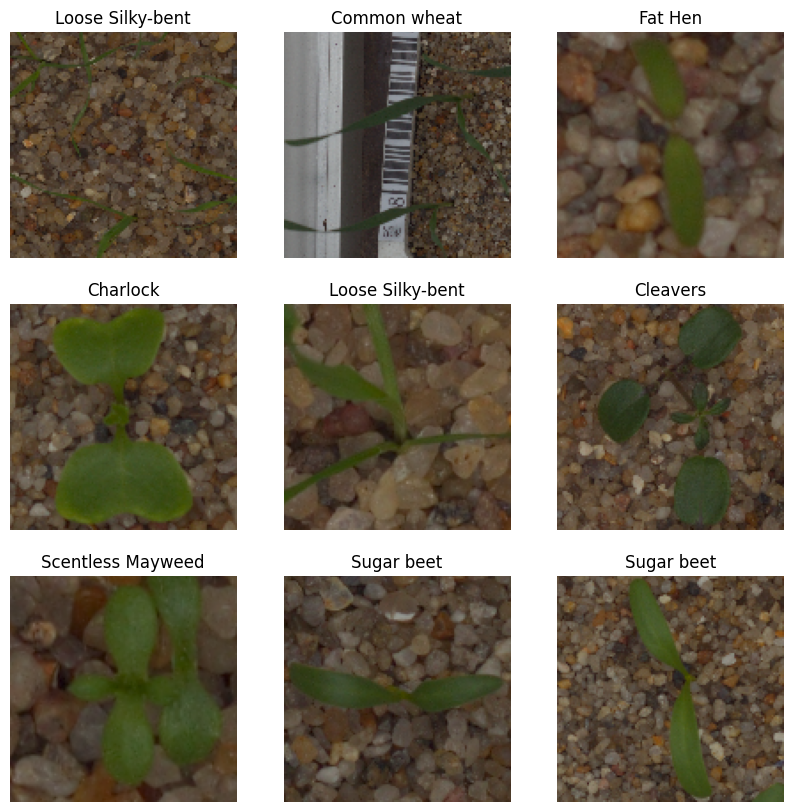

In [ ]:
import matplotlib.pyplot as plt

# 1.1 Sƒ±nƒ±f isimleri
class_names = train_ds.class_names
print("Sƒ±nƒ±f isimleri:", class_names)

# 1.2 Bir batch i√ßinden ilk 9 g√∂rseli g√∂ster
plt.figure(figsize=(10,10)) #ile g√∂rselle≈ütirme i√ßin bir fig√ºr olu≈üturulur ve boyutlarƒ± ayarlanƒ±r.
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show() #G√∂rseller ekranda g√∂r√ºl√ºr


# 9. üìäModel Mimarisi ve Derleme

In [ ]:
#CNN (Convolutional Neural Network) mimarisi manuel olarak TensorFlow ve Keras kullanƒ±larak kullanƒ±lmƒ±≈ütƒ±r:

from tensorflow.keras import Input

inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x) #Conv2D katmanlarƒ± evri≈üim i≈ülemi yapar
x = tf.keras.layers.MaxPooling2D()(x) #MaxPooling2D ile boyut d√º≈ü√ºr√ºl√ºr.
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x) #Flatten + Dense + Dropout ile √∂ƒürenme yapƒ±lƒ±r.
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
# Sƒ±nƒ±f sayƒ±sƒ±nƒ± class_names listesinden al
num_classes = len(class_names)

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x) #Son katman Dense(..., activation='softmax') √ßok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma i√ßindir.

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer='adam', #Adam, yaygƒ±n olarak tercih edilen ve hƒ±zlƒ± ≈üekilde √∂ƒürenme saƒülayan adaptif √∂ƒürenme oranƒ±na sahip bir optimizasyon algoritmasƒ±dƒ±r.
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)        ‚îÇ (None, 128, 128, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ rescaling (Rescaling)           ‚îÇ (None, 128, 128, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 126, 126, 32)   ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 63, 63, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 61, 61, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 30, 30, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 28, 28, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 14, 14, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 25088)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ     3,211,392 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ

 Total params: 3,306,188 (12.61 MB)

 Trainable params: 3,306,188 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# 10. Veri Setini Kontrol

In [ ]:
# ƒ∞lk 3 batch'ten birka√ß g√∂r√ºnt√º ve etiket yazdƒ±r
for images, labels in train_ds.take(1):
    print("G√∂r√ºnt√º boyutu:", images.shape)
    print("Etiket boyutu:", labels.shape)
    print("Etiketler:", labels.numpy())


G√∂r√ºnt√º boyutu: (32, 128, 128, 3)
Etiket boyutu: (32,)
Etiketler: [ 9  0  5  2  6  8  4  5  7  7 10  1 10  6  1  3 10  0 10  4  6  8  8  3
  1  0  3  7  6  8 11 11]


In [ ]:
#train_ds adƒ±ndaki TensorFlow veri k√ºmesinden bir batch (k√ºme) alarak bu batch'teki g√∂r√ºnt√ºlerin (images) ve etiketlerin (labels) boyutlarƒ±nƒ± (≈üekillerini) ekrana yazdƒ±rmak.
for images, labels in train_ds.take(1): #Eƒüitim veri setinden yalnƒ±zca 1 adet batch alƒ±r
    print(images.shape) #images: G√∂rsel verilerini
    print(labels.shape) #labels: Bu g√∂rsellere kar≈üƒ±lƒ±k gelen etiketleri i√ßerir.



(32, 128, 128, 3)
(32,)


 # 11.Veri B√∂lme ve Doƒürulama

In [ ]:
import random

# unbatch ile t√ºm veriyi √∂rnek bazƒ±nda ayƒ±r
all_data = list(train_ds.unbatch().as_numpy_iterator())  #train_ds.unbatch() ‚Üí Batch‚Äôlenmi≈ü veri k√ºmesini tekil √∂rnekler haline getirir. .as_numpy_iterator() ‚Üí TensorFlow tens√∂rlerini NumPy dizilerine d√∂n√º≈üt√ºr√ºr.

# Karƒ±≈ütƒ±r
random.shuffle(all_data) #Verilerin sƒ±rasƒ±nƒ± rastgele deƒüi≈ütirerek modelin √∂ƒürenme sƒ±rasƒ±nda sƒ±ralamadan etkilenmemesini saƒülar.

# %80 eƒüitim, %20 doƒürulama
split_idx = int(len(all_data) * 0.8)  #split_idx: Toplam verinin %80'ini hesaplar.
train_data = all_data[:split_idx] # train_data: ƒ∞lk %80‚Äôlik kƒ±smƒ± (eƒüitim verisi).
val_data = all_data[split_idx:] # val_data: Kalan %20‚Äôlik kƒ±smƒ± (doƒürulama verisi).

# Generator fonksiyonu
def train_gen():
    for x, y in train_data:
        yield x, y

def val_gen():
    for x, y in val_data:
        yield x, y

#Bu iki fonksiyon, listedeki g√∂r√ºnt√º-etiket √ßiftlerini tek tek dƒ±≈üarƒ± verir. TensorFlow dataset olu≈ütururken kullanƒ±lƒ±rlar. Bu fonksiyonlar sayesinde:
#Bellek y√∂netimi optimize edilir.




In [ ]:
#Her √ßaƒürƒ±ldƒ±ƒüƒ±nda (g√∂r√ºnt√º, etiket) √ßifti √ºretirler.
train_ds_new = tf.data.Dataset.from_generator(
    train_gen,
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32), #128x128 boyutunda RGB g√∂r√ºnt√º
        tf.TensorSpec(shape=(), dtype=tf.int32) # Tek bir tam sayƒ± (etiket)
    )
).batch(32).prefetch(tf.data.AUTOTUNE) #Veriyi 32‚Äôlik gruplar halinde paketler (batch'ler). Bu sayede model her seferinde 32 √∂rnek ile eƒüitilir. GPU/TPU kullanƒ±mƒ± i√ßin gereklidir.

val_ds = tf.data.Dataset.from_generator(
    val_gen,
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
).batch(32).prefetch(tf.data.AUTOTUNE) #Veri pipeline'ƒ±nƒ± optimize eder. Model eƒüitilirken bir yandan bir sonraki batch hafƒ±zaya hazƒ±rlanƒ±r.
#Bu, eƒüitim sƒ±rasƒ±nda bekleme s√ºresini azaltƒ±r, i≈ülemci ve GPU'nun verimli √ßalƒ±≈ümasƒ±nƒ± saƒülar.


# 12. ü§ñ Model Se√ßimi ve Eƒüitimi  

In [ ]:
# modeli eƒüitmek (train etmek) i√ßin kullanƒ±lan ana fonksiyondur.
history = model.fit(
    train_ds_new,
    validation_data=val_ds,  # Eƒüitim sƒ±rasƒ±nda a≈üƒ±rƒ± √∂ƒürenme (overfitting) olup olmadƒ±ƒüƒ± buradan takip edilir.
    epochs=15,                # T√ºm eƒüitim verisi 15 kez modele g√∂sterilecek. Her bir ge√ßi≈ü (epoch), modelin aƒüƒ±rlƒ±klarƒ±nƒ± g√ºnceller.
    class_weight=class_weights  # Sƒ±nƒ±f dengesizliƒüini telafi etmek i√ßin aƒüƒ±rlƒ±klar eklendi.
)



Epoch 1/15
    119/Unknown 133s 1s/step - accuracy: 0.0995 - loss: 2.4288

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147s 1s/step - accuracy: 0.1001 - loss: 2.4276 - val_accuracy: 0.3063 - val_loss: 1.8016
Epoch 2/15
119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 204s 1s/step - accuracy: 0.3021 - loss: 1.9170 - val_accuracy: 0.3958 - val_loss: 1.5996
Epoch 3/15
119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 208s 1s/step - accuracy: 0.4075 - loss: 1.6542 - val_accuracy: 0.4926 - val_loss: 1.3866
Epoch 4/15
119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 261s 2s/step - accuracy: 0.4832 - loss: 1.4413 - val_accuracy: 0.5137 - val_loss: 1.2736
Epoch 5/15
119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 200s 1s/step - accuracy: 0.5527 - loss: 1.3085 - val_accuracy: 0.6453 - val_loss: 1.1058
Epoch 6/15
119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 207s 1s/step - accuracy: 0.6116 - loss: 1.1172 - val_accuracy: 0.6537 - val_loss: 1.03

# 13.F1 Score

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))     # tahmin edilen sƒ±nƒ±f
    y_true.extend(labels.numpy())               # ger√ßek sƒ±nƒ±f


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 324ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 301ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 323ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 299ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 320ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 331ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 315ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 289ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 338ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 537ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 534ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 511ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


                           precision    recall  f1-score   support

              Black-grass       0.44      0.52      0.48        56
                 Charlock       0.93      0.71      0.81        73
                 Cleavers       0.92      0.76      0.83        59
         Common Chickweed       0.90      0.90      0.90       127
             Common wheat       0.70      0.65      0.67        48
                  Fat Hen       0.68      0.84      0.75        89
         Loose Silky-bent       0.74      0.70      0.72       126
                    Maize       0.83      0.71      0.76        41
        Scentless Mayweed       0.72      0.73      0.73       101
          Shepherds Purse       0.60      0.42      0.49        43
Small-flowered Cranesbill       0.77      0.95      0.85        97
               Sugar beet       0.74      0.74      0.74        90

                 accuracy                           0.75       950
                macro avg       0.75      0.72      0.73    

# 14.Eƒüitim Performansƒ±nƒ±n G√∂rselle≈ütirilmesi

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] #Eƒüitim sƒ±rasƒ±nda elde edilen doƒüruluk deƒüerleri.
val_acc = history.history['val_accuracy'] #Doƒürulama sƒ±rasƒ±nda elde edilen doƒüruluk deƒüerleri.
loss = history.history['loss'] #Eƒüitim sƒ±rasƒ±nda elde edilen kayƒ±p deƒüerleri.
val_loss = history.history['val_loss'] #Doƒürulama sƒ±rasƒ±nda elde edilen kayƒ±p deƒüerleri.
epochs = range(1, len(acc)+1) #Eƒüitim d√∂nemlerinin (epoch) sayƒ±sƒ±.

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Eƒüitim Doƒüruluk')
plt.plot(epochs, val_acc, label='Doƒürulama Doƒüruluk')
plt.legend()
plt.title('Doƒüruluk Eƒürisi')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Eƒüitim Kayƒ±p')
plt.plot(epochs, val_loss, label='Doƒürulama Kayƒ±p')
plt.legend()
plt.title('Kayƒ±p Eƒürisi')

plt.show()

 #Soldaki grafik: Modelin eƒüitim doƒüruluƒüu ve doƒürulama doƒüruluƒüunun zaman i√ßindeki deƒüi≈üimini g√∂sterir.
 #Saƒüdaki grafik: Modelin eƒüitim kaybƒ± ve doƒürulama kaybƒ±nƒ±n zaman i√ßindeki deƒüi≈üimini g√∂sterir.


Eƒüitim ve doƒürulama doƒüruluklarƒ± arasƒ±nda belirgin bir sapma yok. Bu durum, modelin a≈üƒ±rƒ± √∂ƒürenme (overfitting) yapmadƒ±ƒüƒ±nƒ±, eƒüitim ve doƒürulama verileri √ºzerinde dengeli bir √∂ƒürenme ger√ßekle≈ütirdiƒüini g√∂steriyor.
Eƒüitim doƒüruluƒüu ve doƒürulama doƒüruluƒüu birbirine yakƒ±n seyrediyor; bu da modelin iyi bir genel performansa sahip olduƒüunu g√∂steriyor.

Modelde eƒüitim ve doƒürulama doƒüruluklarƒ± ile kayƒ±plar arasƒ±nda ciddi bir sapma g√∂r√ºlm√ºyor. Bu durum modelin iyi bir ≈üekilde genelle≈ütiƒüini ve a≈üƒ±rƒ± √∂ƒürenme yapmadƒ±ƒüƒ±nƒ± g√∂steriyor.
Eƒüitim ve doƒürulama kayƒ±plarƒ±nƒ±n d√º≈ü√º≈ü eƒüilimi, modelin optimizasyon s√ºrecinin ba≈üarƒ±lƒ± olduƒüunu ifade ediyor.



# 15.Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 294ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 322ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 309ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 294ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 310ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 293ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 296ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 292ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 290ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 439ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 533ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 516ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

<Figure size 1000x1000 with 0 Axes>

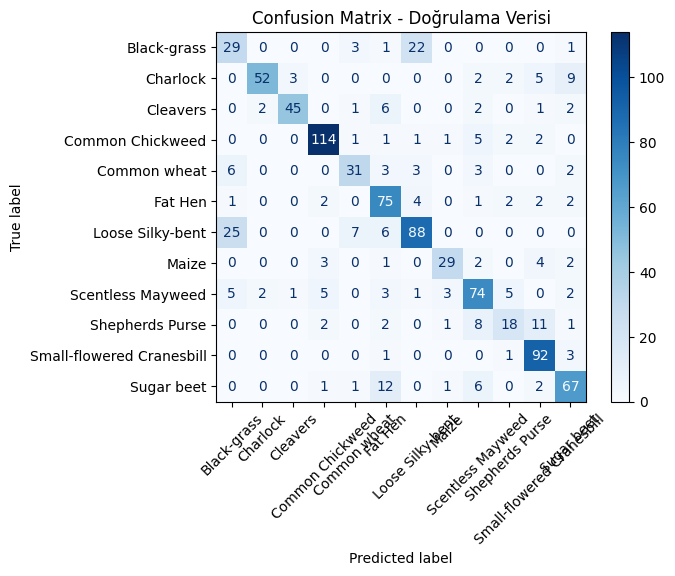

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Doƒürulama Verisi")
plt.show()


Common Chickweed: 114 doƒüru sƒ±nƒ±flandƒ±rma

Small-flowered Cranesbill: 92 doƒüru sƒ±nƒ±flandƒ±rma

Sugar beet: 67 doƒüru sƒ±nƒ±flandƒ±rma

Common Chickweed, 1 kez Common wheat ve 1 kez Fat Hen olarak yanlƒ±≈ü sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü.

Black-grass, 12 kez Loose Silky-bent olarak yanlƒ±≈ü sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü.

Loose Silky-bent, 25 kez Black-grass olarak yanlƒ±≈ü sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü.

Loose Silky-bent ve Black-grass arasƒ±nda belirgin bir karƒ±≈üƒ±klƒ±k var. Model bu iki sƒ±nƒ±fƒ± birbirine karƒ±≈ütƒ±rƒ±yor.

Common Chickweed ve Small-flowered Cranesbill sƒ±nƒ±flarƒ± olduk√ßa ba≈üarƒ±lƒ± bir ≈üekilde ayƒ±rt edilmi≈ü.

# 16.ROC Eƒürisi

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Ger√ßek etiketler
y_true = []
y_pred_proba = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    preds = model.predict(images)
    y_pred_proba.extend(preds)



1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 540ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 429ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 396ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 492ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 545ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 542ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 486ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 331ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 303ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 296ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 311ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
# Sƒ±nƒ±f sayƒ±sƒ±nƒ± al
n_classes = len(class_names)

# Etiketleri binarize et
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
y_pred_proba = np.array(y_pred_proba)


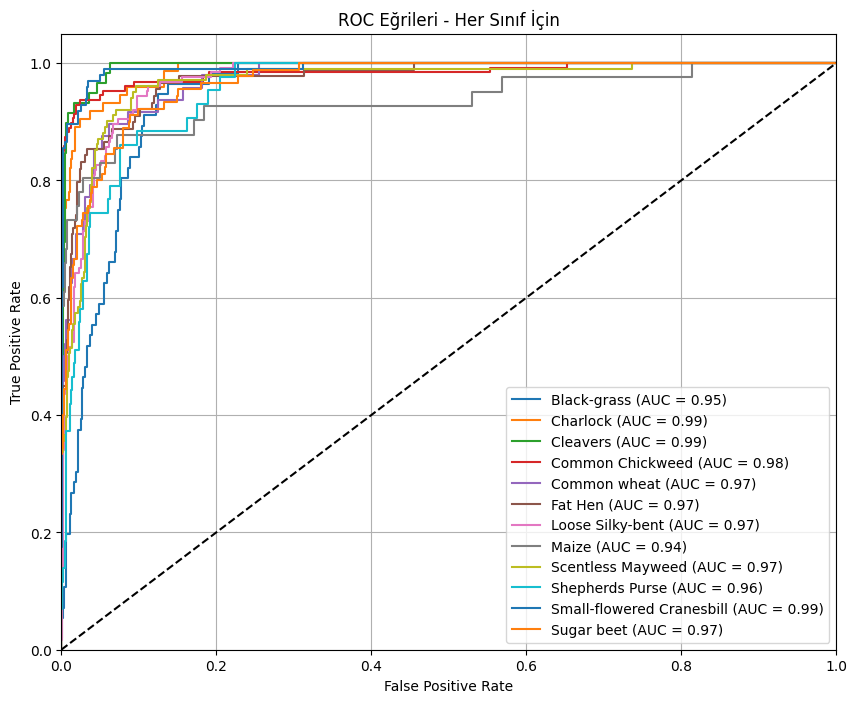

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # referans √ßizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eƒürileri - Her Sƒ±nƒ±f ƒ∞√ßin')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Charlock, Cleavers, Small-flowered Cranesbill ve Sugar beet i√ßin AUC deƒüeri 0.99 ile olduk√ßa y√ºksek. Bu, modelin bu sƒ±nƒ±flar i√ßin ayƒ±rt edici g√ºc√ºn√ºn √ßok iyi olduƒüunu g√∂steriyor.
Common Chickweed ve Fat Hen i√ßin AUC 0.98 ve 0.97. Bu sƒ±nƒ±flar i√ßin model hala √ßok ba≈üarƒ±lƒ±.
Black-grass ve Maize i√ßin AUC sƒ±rasƒ±yla 0.95 ve 0.94. Bu sƒ±nƒ±flar i√ßin performans hala iyi ancak diƒüerlerine g√∂re biraz daha d√º≈ü√ºk.

Modelin genel performansƒ± olduk√ßa iyi. √áoƒüu sƒ±nƒ±f i√ßin AUC deƒüerleri 0.95 ve √ºzerinde.
Maize ve Black-grass i√ßin AUC deƒüerlerinin nispeten d√º≈ü√ºk olmasƒ±, bu iki sƒ±nƒ±f i√ßin daha fazla veri veya daha iyi √∂zellik m√ºhendisliƒüi ihtiyacƒ±nƒ± g√∂sterebilir.

# 17. üìù Test Seti √úzerinde Tahmin ve Sonu√ßlarƒ±n Kaydedilmesi

In [ ]:
import numpy as np
import pandas as pd
import os

# Test veri seti √ºzerinde tahmin
preds = model.predict(test_ds) #Test veri seti (test_ds) √ºzerinde modelin tahminlerini yapar. preds her bir g√∂r√ºnt√º i√ßin modelin √ßƒ±ktƒ±sƒ± (sƒ±nƒ±f olasƒ±lƒ±klarƒ±) olacaktƒ±r.
predicted_labels = np.argmax(preds, axis=1) #her bir tahminin en y√ºksek olasƒ±lƒ±ƒüa sahip olduƒüu sƒ±nƒ±fƒ± se√ßer. Bu, her bir g√∂r√ºnt√º i√ßin modelin tahmin ettiƒüi sƒ±nƒ±f etiketini alƒ±r.

predicted_species = [class_names[i] for i in predicted_labels]
print(predicted_species[:10])  # ilk 10 tanesini g√∂ster



25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 404ms/step
['Small-flowered Cranesbill', 'Fat Hen', 'Sugar beet', 'Common Chickweed', 'Sugar beet', 'Loose Silky-bent', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Loose Silky-bent']


# 18.Tahminleri G√∂rselle≈ütir

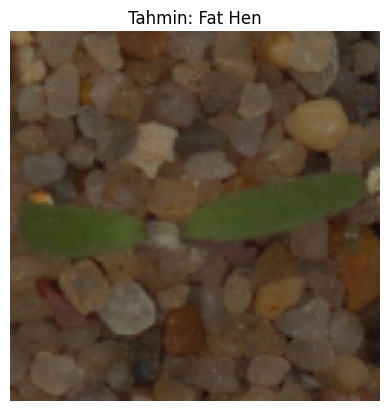

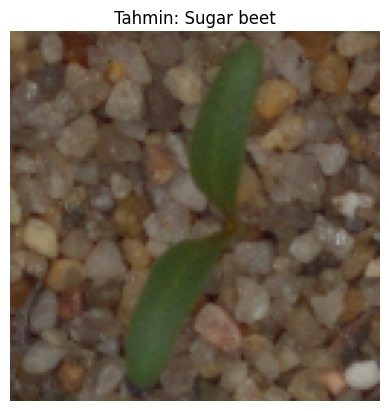

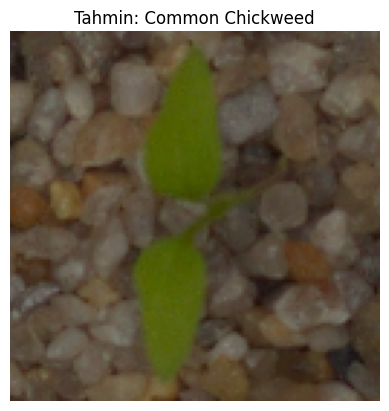

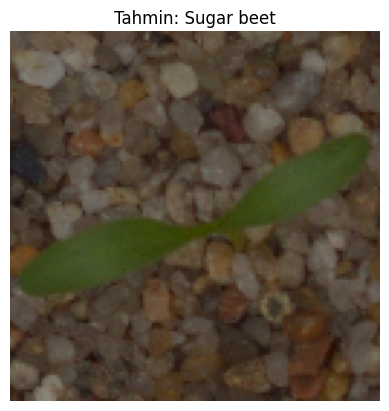

In [ ]:
import matplotlib.pyplot as plt

for images in test_ds.take(1):
    for i in range(5):  # ilk 5 g√∂r√ºnt√º
        img = images[i].numpy().astype("uint8")
        plt.imshow(img)
        plt.title(f"Tahmin: {class_names[predicted_labels[i]]}")
        plt.axis("off")
        plt.show()

# 19.DataFrame Olu≈ütur

In [ ]:
# Dosya adlarƒ±nƒ± al
file_names = [os.path.basename(path) for path in test_ds.file_paths]

# DataFrame olu≈ütur
submission = pd.DataFrame({
    'file': file_names,
    'species': [class_names[i] for i in predicted_labels]
})

# CSV olarak kaydet
submission.to_csv('submission.csv', index=False)
print("submission.csv olu≈üturuldu.")


submission.csv olu≈üturuldu.


# 20.CSV'nin Kaydedilmesi

In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>